In [204]:
import pandas as pd 
import numpy as np

In [205]:
HR_df = pd.read_csv('HR_analytics.csv')

In [206]:
HR_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# summary stats

In [207]:
summary_stats = HR_df.describe()
summary_stats
# categorical variables = Work_accident , left, promotion_last_5years

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [208]:
department_count = HR_df['Department'].value_counts()
department_count

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [209]:
salary_count = HR_df['salary'].value_counts()
salary_count

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [210]:
import matplotlib.pyplot as plt
import numpy as np

In [211]:
satifaction_level = HR_df['satisfaction_level'].tolist()
satifaction_level = np.array(satifaction_level)
satifaction_level


array([0.38, 0.8 , 0.11, ..., 0.37, 0.11, 0.37], shape=(14999,))

In [212]:
left_labels = HR_df['left'].tolist()
left_labels = np.array(left_labels)
left_labels

array([1, 1, 1, ..., 1, 1, 1], shape=(14999,))

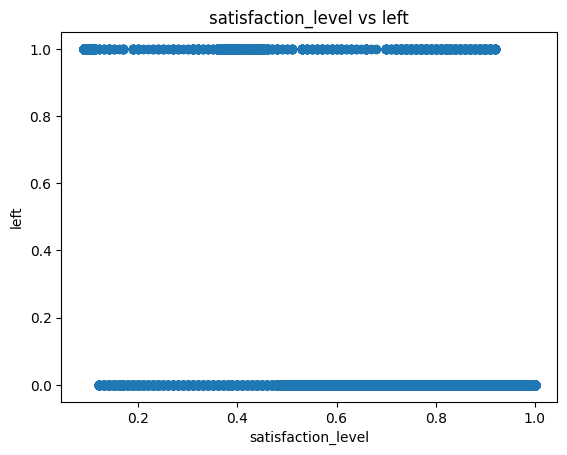

In [213]:
plt.scatter(satifaction_level, left_labels)
plt.xlabel('satisfaction_level')
plt.ylabel('left')      
plt.title('satisfaction_level vs left')
plt.show()

### checking imbalnces 

In [214]:
left_column_rate = HR_df['left'].value_counts(normalize=True)
left_column_rate

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [215]:
numeric_col = [c for c in HR_df.select_dtypes(include=[np.number]).columns if c not in ['left']]
numeric_col


['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [216]:
cat_colms = [c for c in HR_df.columns if c not in numeric_col ]
cat_colms

['left', 'Department', 'salary']

In [217]:
stats_acc_left = HR_df.groupby('left')[numeric_col].mean()
stats_acc_left = stats_acc_left.T
stats_acc_left['difference'] = stats_acc_left[1] - stats_acc_left[0]
stats_acc_left

left,0,1,difference
satisfaction_level,0.666810,0.440098,-0.226712
last_evaluation,0.715473,0.718113,0.002639
number_project,3.786664,3.855503,0.068838
average_montly_hours,199.060203,207.419210,8.359007
time_spend_company,3.380032,3.876505,0.496474
Work_accident,0.175009,0.047326,-0.127683
promotion_last_5years,0.026251,0.005321,-0.020931


In [218]:
correlation_with_left = HR_df[numeric_col + ['left']].corr()['left'].drop('left')
correlation_with_left = correlation_with_left.sort_values()
correlation_with_left

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Name: left, dtype: float64

staisfaction level has a concerning relationship with left and it is negative .

In [219]:
cat_stats_acc_left = {}
for c in cat_colms:
    if not (c == 'left'):
        rates = HR_df.groupby(c)["left"].mean()
        cat_stats_acc_left[c] = rates
cat_stats_acc_left

{'Department': Department
 IT             0.222494
 RandD          0.153748
 accounting     0.265971
 hr             0.290934
 management     0.144444
 marketing      0.236597
 product_mng    0.219512
 sales          0.244928
 support        0.248991
 technical      0.256250
 Name: left, dtype: float64,
 'salary': salary
 high      0.066289
 low       0.296884
 medium    0.204313
 Name: left, dtype: float64}

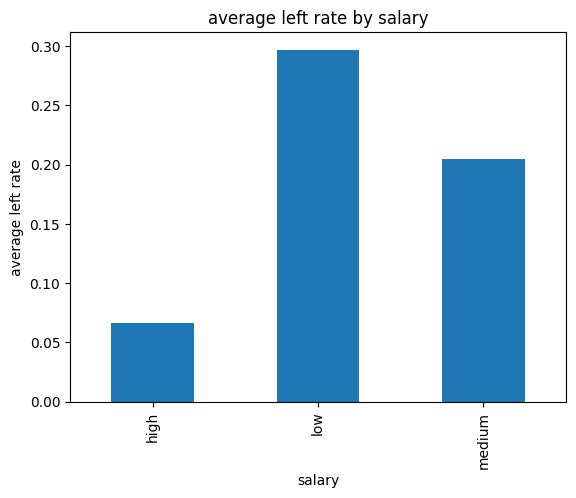

In [220]:
plt.figure()
HR_df.groupby('salary')['left'].mean().plot(kind='bar')
plt.title('average left rate by salary')
plt.xlabel('salary')
plt.ylabel('average left rate')
plt.show()

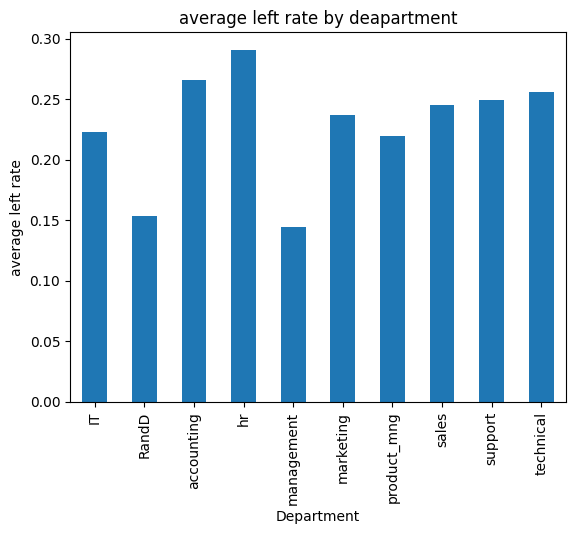

In [221]:
plt.figure()
HR_df.groupby('Department')['left'].mean().plot(kind='bar')
plt.title('average left rate by deapartment')
plt.xlabel('Department')
plt.ylabel('average left rate')
plt.show()

those who are getfing low salary tend to left.

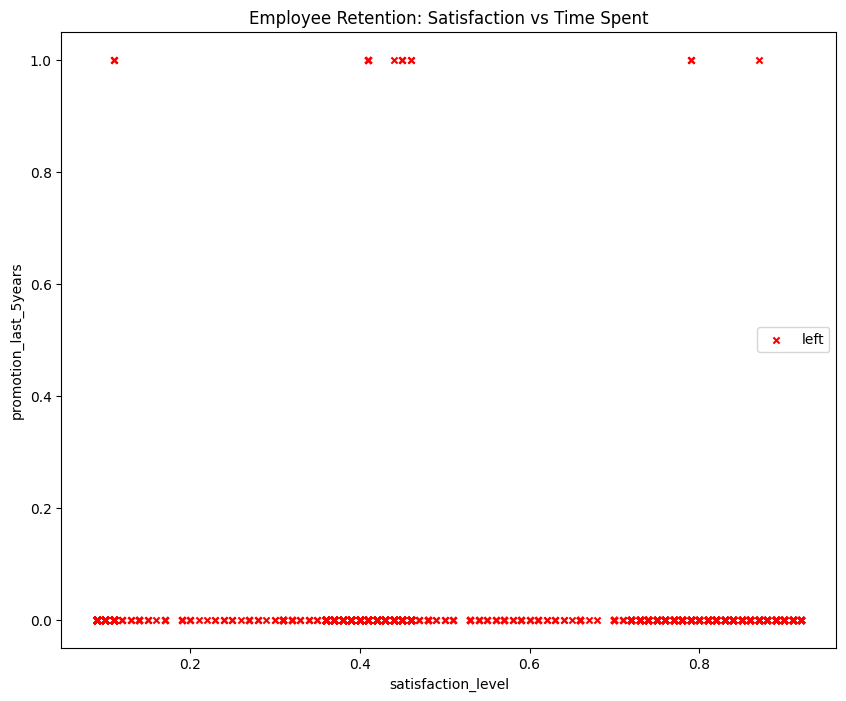

In [222]:
plt.figure(figsize=(10,8))
# plt.scatter(HR_df[HR_df['left']==0]['satisfaction_level'],HR_df[HR_df['left']==0]['promotion_last_5years'], color='blue', label='stayed',s=10)
plt.scatter(HR_df[HR_df['left']==1]['satisfaction_level'],HR_df[HR_df['left']==1]['promotion_last_5years'], color='red', label='left',marker='x',s=20)
plt.xlabel('satisfaction_level')
plt.ylabel('promotion_last_5years')
plt.title("Employee Retention: Satisfaction vs Time Spent")
plt.legend()
plt.show()

plt.scatter(HR)

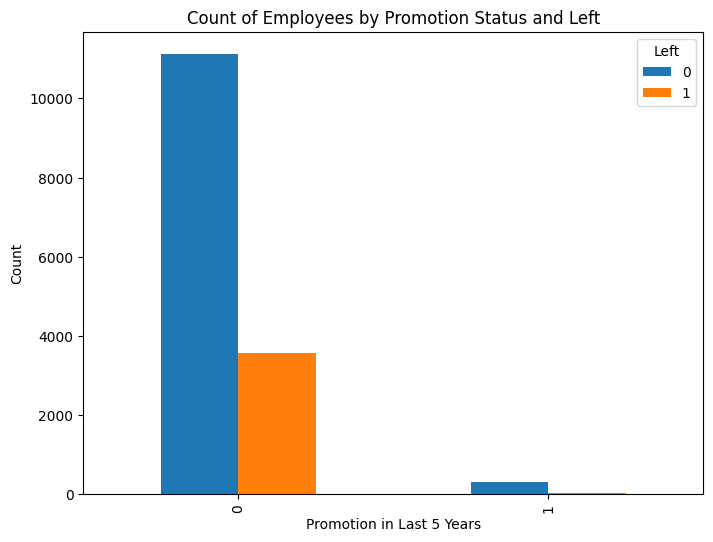

In [223]:
promotion_left_counts = pd.crosstab(HR_df['promotion_last_5years'], HR_df['left'])
promotion_left_counts.plot(kind='bar', figsize=(8,6))
plt.title('Count of Employees by Promotion Status and Left')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

In [224]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [225]:
y = HR_df['left'].astype(int)
X = HR_df.drop(columns=['left'])

In [226]:
y.shape

(14999,)

In [227]:
num_col = [c for c in HR_df.select_dtypes(include=[np.number]).columns if not c=='left' ]
num_col

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [228]:
cat_col = [c for c in HR_df.columns if c not in num_col and c!='left']
cat_col

['Department', 'salary']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
     confusion_matrix, classification_report
)

In [230]:
X_train ,X_test ,y_train , y_test = train_test_split(X, y, stratify=y, random_state=42)

In [231]:
preprocessor = ColumnTransformer(
    transformers=[("num" , StandardScaler() , num_col),
                  ("cat" , OneHotEncoder(drop="first" ,handle_unknown="ignore" ) , cat_col)
                  ],
                  verbose_feature_names_out=False
)

In [232]:
model = LogisticRegression(
    max_iter=2000 ,
    solver='saga',
    class_weight='balanced',
    penalty='l2'
)

In [233]:
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model' , model)
])


In [234]:
pipe.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [237]:
y_predicted = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)
y_proba

array([[0.2893877 , 0.7106123 ],
       [0.60420152, 0.39579848],
       [0.11149472, 0.88850528],
       ...,
       [0.55573807, 0.44426193],
       [0.37260294, 0.62739706],
       [0.83590021, 0.16409979]], shape=(3750, 2))

In [240]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2857
           1       0.50      0.80      0.62       893

    accuracy                           0.77      3750
   macro avg       0.71      0.78      0.72      3750
weighted avg       0.82      0.77      0.78      3750



In [244]:
cm = confusion_matrix(y_test,y_predicted)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])

print(cm_df)

          Pred 0  Pred 1
Actual 0    2159     698
Actual 1     181     712
